## Predicting legendary Pokemons

We use a Pokemon dataset found on kaggle to predict if a Pokemon is a legendary using its stats and its type. We use 4  classifiction algorithms and choose the best one.

In [427]:
# Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [432]:
# Import the data

pokemon = pd.read_csv('Pokemon.csv')

In [389]:
# View the top of the data

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [390]:
# View the bottom of the data

pokemon.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [391]:
# Get information about the different features

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [392]:
# Get information about the values of the features

pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Data cleaning

In [393]:
# Create function to scan a name and find the word Mega in it

import re

def isMega(s):
    words = re.findall('[A-Z][a-z]*', s)
    return ('Mega' in words)

In [433]:
# Create a new feature saying if a Pokemon is mega or not

pokemon['Mega'] = pokemon['Name'].apply(isMega)

In [434]:
# Create a new feature saying if a Pokemon has one or two types

pokemon['Dual Type'] = ~pokemon['Type 2'].isnull()

In [435]:
# Fill the null entries in 'Type 2' with 'none'

pokemon['Type 2'] = pokemon['Type 2'].fillna('None')

In [438]:
# Get dumy variables for 'Type 1' and 'type 2' and add them to the data

pokemon = pokemon.merge(pd.get_dummies(data=pokemon, columns=['Type 1', 'Type 2']))

In [439]:
# Look at the new data

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,0,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,0,0,0,0,1,0,0,0,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,...,0,0,0,1,0,0,0,0,0,0
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,...,0,0,0,1,0,0,0,0,0,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,0,0,0,0,0,0,0,0,0,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,0,0,0,0,0,0,0,0,0,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,0,0,0,0,0,0,0,0,0,0
9,7,Squirtle,Water,None,314,44,48,65,50,64,...,0,0,0,1,0,0,0,0,0,0


In [440]:
# Look at the columns of the new data to make sure everything is ok

pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Mega',
       'Dual Type', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon',
       'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic',
       'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug',
       'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy',
       'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost',
       'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_None',
       'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock',
       'Type 2_Steel', 'Type 2_Water'],
      dtype='object')

In [453]:
# Creating new data without the mega evolutions

pokemon_nomegas = pokemon[pokemon['Mega']==False].reset_index(drop=True)

# Data visualization

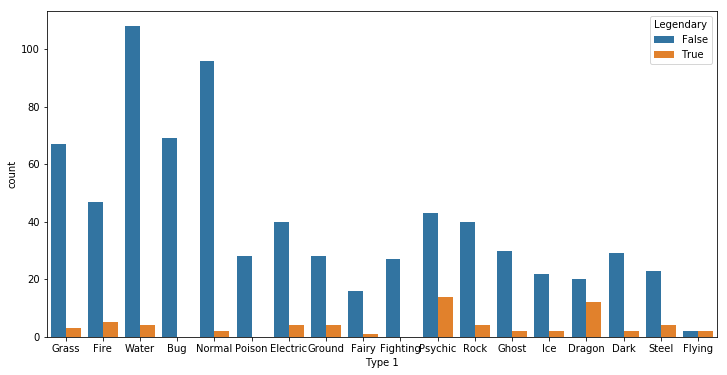

In [442]:
# Plot the distribution of 'Type 1' for legendaries and non legendaries

plt.figure(figsize=(12,6))
sns.countplot(pokemon['Type 1'], hue=pokemon['Legendary'])

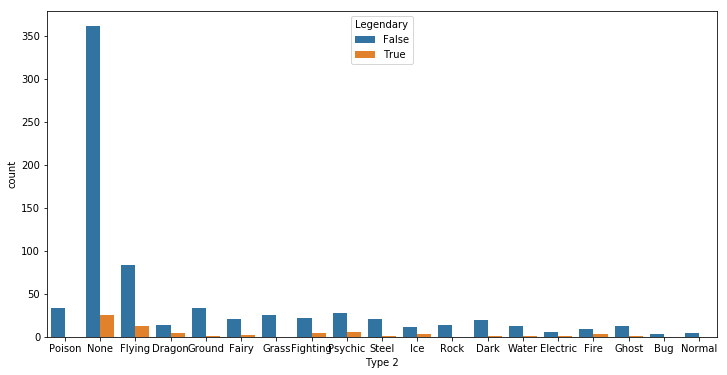

In [443]:
# Plot the distribution of 'Type 2' for legendaries and non legendaries

plt.figure(figsize=(12,6))
sns.countplot(pokemon['Type 2'], hue=pokemon['Legendary'])

In [444]:
# Separate the data to see how many legendaries there are for Pokemon with and without dual types

pokemon.groupby(['Dual Type', 'Legendary'])['Name'].nunique()

Dual Type  Legendary
False      False        361
           True          25
True       False        374
           True          40
Name: Name, dtype: int64

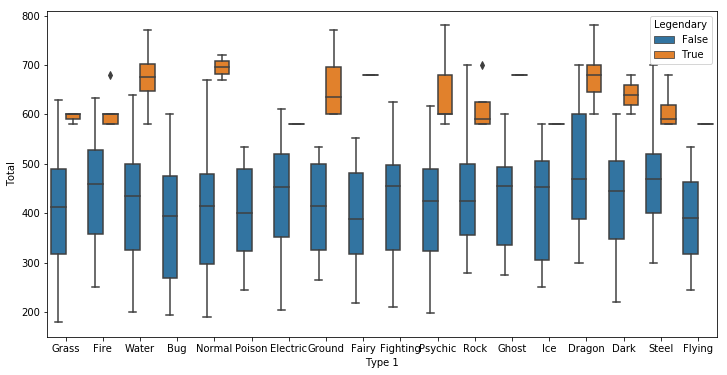

In [445]:
# Plot the total stats for legendaries and non legendaries

plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1', y='Total', data=pokemon, hue='Legendary')

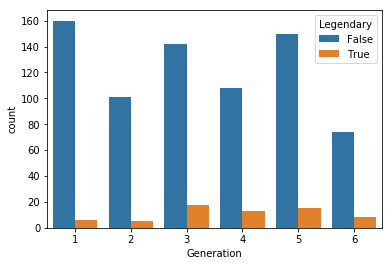

In [465]:
# Plot the number of legendaries per generation

sns.countplot(pokemon['Generation'], hue=pokemon['Legendary'])

C:\Users\Yan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


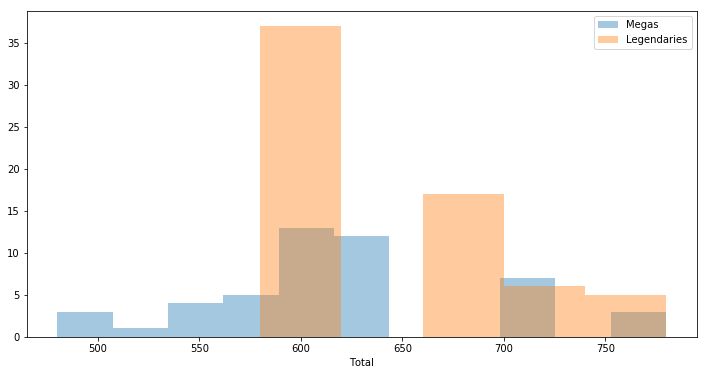

In [464]:
# Compare the total stats of Megas with legendaries

plt.figure(figsize=(12,6))
sns.distplot(pokemon[pokemon['Mega']==True]['Total'], kde=False, label='Megas')
sns.distplot(pokemon[pokemon['Legendary']==True]['Total'], kde=False, label='Legendaries')
plt.legend()

# Classification setup

We will use the following 4 classification algorithms:
- k nearest neighbors
- logistic regression
- random forest
- naive Bayes

The features that are used to train the model are Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation plus all the types. 

In [400]:
# Import the algorithms and metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [418]:
# Define a function that runs the 4 algorithms and gives the accuracy, overall (macro) f1 score and confusion matrix for each

def learn(X, y, state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=state)
    models = [('kNN', KNeighborsClassifier()), ('log_reg', LogisticRegression()), ('bayes', GaussianNB()), ('forest', RandomForestClassifier())]
    
    for name, classifier in models:
        model = classifier
        pred = model.fit(X_train, y_train).predict(X_test)
        f1 = f1_score(y_test, pred, average='macro')
        acc = accuracy_score(y_test, pred)
        print(name)
        print('f1-score:', f1)
        print('accuracy:', acc)
        print(confusion_matrix(y_test, pred), '\n')

# Predict with the megas

In [412]:
X = pokemon.drop(['#','Name','Mega','Dual Type','Legendary'],axis=1)
y = pokemon['Legendary']

In [466]:
learn(X, y, 5)

kNN
f1-score: 0.8537770014059904
accuracy: 0.9507575757575758
[[233  10]
 [  3  18]] 

log_reg
f1-score: 0.6606060606060605
accuracy: 0.9204545454545454
[[237   6]
 [ 15   6]] 

bayes
f1-score: 0.37695414587788073
accuracy: 0.4356060606060606
[[ 98 145]
 [  4  17]] 

forest
f1-score: 0.8582169709989258
accuracy: 0.9621212121212122
[[240   3]
 [  7  14]] 



# Predict without megas

In [416]:
X_nomegas = pokemon_nomegas.drop(['#','Name','Mega','Dual Type','Legendary'],axis=1)
y_nomegas = pokemon_nomegas['Legendary']

In [467]:
learn(X_nomegas, y_nomegas, 5)

kNN
f1-score: 0.8707836014530359
accuracy: 0.9558232931726908
[[220  11]
 [  0  18]] 

log_reg
f1-score: 0.7729483282674772
accuracy: 0.9518072289156626
[[229   2]
 [ 10   8]] 

bayes
f1-score: 0.39880568405919975
accuracy: 0.4738955823293173
[[103 128]
 [  3  15]] 

forest
f1-score: 0.8748114630467572
accuracy: 0.963855421686747
[[225   6]
 [  3  15]] 



# Checking incorrectly classified examples

In [472]:
# Using different train-test split

X_train, X_test, y_train, y_test = train_test_split(X_nomegas, y_nomegas, test_size=0.33)

In [473]:
# Train the kNN model, which seems to be among the best, and make predictions

model = KNeighborsClassifier()
pred = model.fit(X_train, y_train).predict(X_test)

In [474]:
# List the incorrectly classified examples

pokemon_nomegas.iloc[list(X_test[y_test != pred].index)][['Name','Total','Legendary']]

,Name,Total,Legendary
649,Hydreigon,600,False
386,Jirachi,600,True
653,Terrakion,580,True
500,Cresselia,600,False
288,Slaking,670,False
670,Genesect,600,False
581,Archeops,567,False
662,LandorusTherian Forme,600,True
